In [24]:
%matplotlib notebook
import numpy as np
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import plotting_resources as res
import astropy.units as u
import matplotlib
plt.rc('text', usetex=True)
plt.ion()

rauto_cut = 22.9
frauto_cut = 10**((rauto_cut-23.9)/(-2.5))

In [2]:
def find_histogram_edges(hist, bins):
    xs, ys = [], []
    for i in range(len(hist)):
        xs.append(bins[i])
        xs.append(bins[i+1])
        ys.append(hist[i])
        ys.append(hist[i])
    return xs, ys

For the case of multiple clusters in the same field, my strategy is to include

# Load the LDP data

In [3]:
ldpin = Table().read('../catalogs/personal_catalogs/slits_phot_zs_cutonslitdist_rcl.csv', format='csv')
ldpcut = ldpin[np.where(ldpin['Q']>=2)]
ldpcut = ldpcut[np.where(ldpcut['slit_distance'] < 1.0)]
ldpcut = ldpcut[np.where(ldpcut['Rauto'] <= rauto_cut)]
#ldpcut['d_cl'] = -1.0
ldpcut['theta_cl_arcmin'] = ldpcut['theta_cl_radian']*(180./np.pi)*60.

In [4]:
fieldlist = sorted(list(set(ldpcut['field'])))
print(fieldlist)
print(ldpcut.colnames)

['CL1018', 'CL1037', 'CL1040', 'CL1054-11', 'CL1054-12', 'cl1059', 'cl1103', 'cl1138', 'cl1216', 'cl1227', 'cl1232', 'cl1301', 'cl1353', 'cl1354', 'cl1411', 'cl1420']
['field', 'ids', 'ra', 'dec', 'x', 'y', 'B1', 'V1', 'R1', 'I1', 'z1', 'B2', 'V2', 'R2', 'I2', 'z2', 'B3', 'V3', 'R3', 'I3', 'z3', 'Bauto', 'Vauto', 'Rauto', 'Iauto', 'zauto', 'zLDP5_7', 'Q5_7', 'zphot', 'zphot_errUP', 'zphot_errLO', 'class_StarR', 'zLDP', 'zLDPerr', 'Q', 'zLDP_good', 'slit_distance', 'zSpec', 'zSpec_Q', 'spec_type', 'theta_cl_radian', 'd_cl_mpc', 'theta_cl_arcmin']


In [5]:
print(len(ldpcut))

29821


# Load the cluster centers

In [6]:
cldict = res.load_clusters()

# Calculate $d_{cl}$ for each object

In [7]:
ldp_rcl = Table()
for cl in cldict:
    if not cl['count']:
        print('skipping {}'.format(cl['papername']))
        continue
    subcat = ldpcut[np.where(ldpcut['field'] == cl['tablename'])]
    center = SkyCoord(cl['ra']*u.degree, cl['dec']*u.degree)
    objs = SkyCoord(subcat['ra']*u.degree, subcat['dec']*u.degree)
    subcat['d_cl'] = center.separation(objs).arcminute
    
    ldp_rcl = vstack([ldp_rcl, subcat])

skipping cl1037.9-1243a
skipping cl1103.7-1245b
skipping cl1227.9-1138a
skipping cl1301.7-1139a
skipping cl1354.2-1230a


# Bin $d_{cl}$

<IPython.core.display.Javascript object>


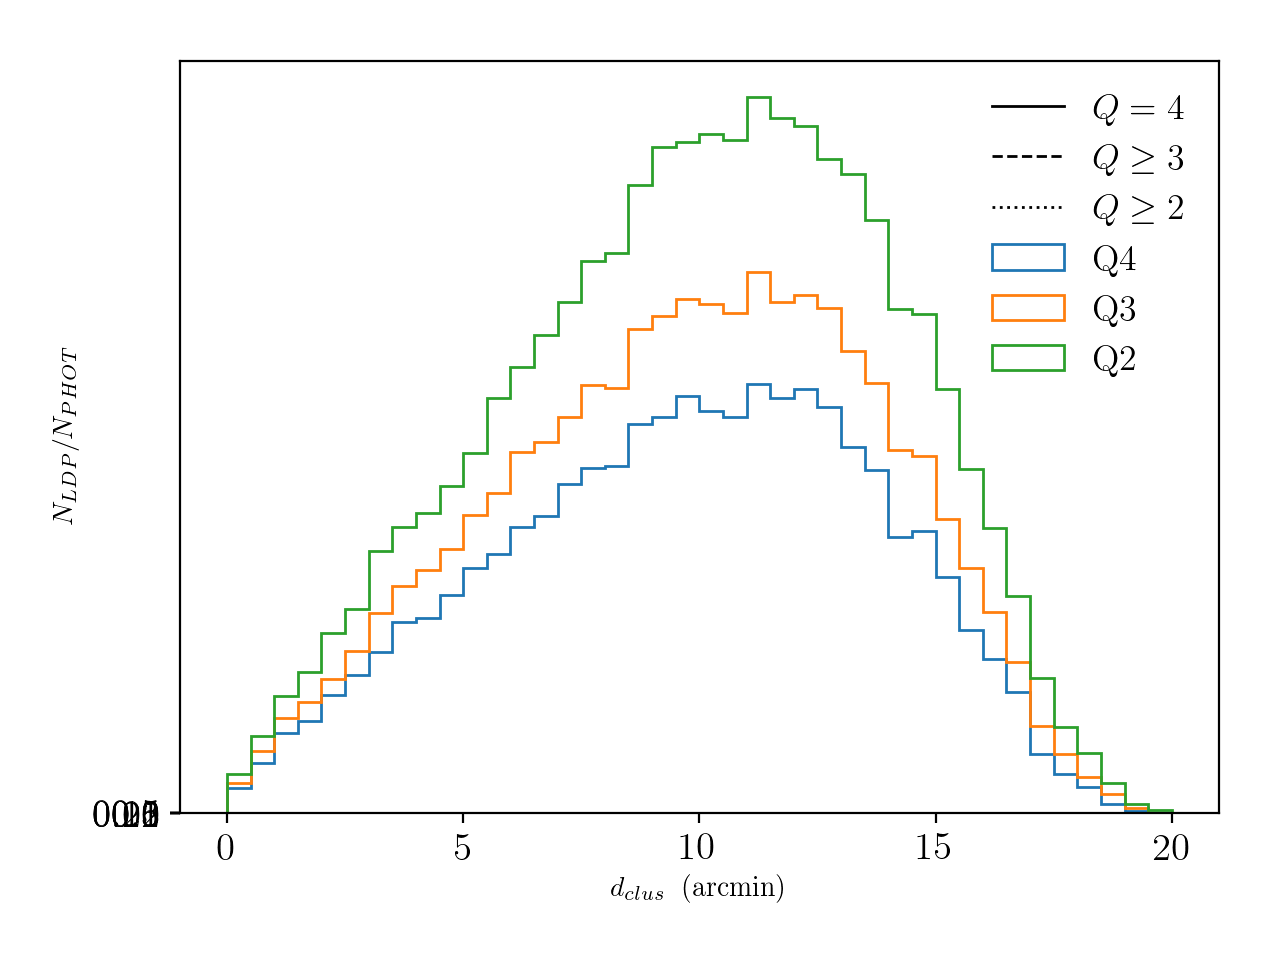

In [8]:
bin_edges = np.linspace(0,20, 41) # 0.5 arcmin

Q4 = ldpcut[np.where(ldpcut['Q'] == 4)]
Q3 = ldpcut[np.where(ldpcut['Q'] >= 3)]
Q2 = ldpcut[np.where(ldpcut['Q'] >= 2)]

plt.hist(Q4['theta_cl_arcmin'], bins=bin_edges, histtype='step', label='Q4')
plt.hist(Q3['theta_cl_arcmin'], bins=bin_edges, histtype='step', label='Q3')
plt.hist(Q2['theta_cl_arcmin'], bins=bin_edges, histtype='step', label='Q2')
plt.legend()
plt.show()

# Calculate $d_{cl}$ for each photometry object

In [9]:
def flux2mag(f):
    return -2.5*np.log10(f) + 23.9

def calc_mag(photo, filt):
    flux = 'f'+filt
    mag = flux2mag(photo[flux])
    #mag = [flux2mag(f) for f in photo[flux]]
    photo[filt] = mag
    photo[filt][np.isnan(mag)] = 101.
    #photo[filt].mask = np.isnan(mag)

    return

In [10]:
fullphoto = Table()
for cl in cldict:
    
    if not cl['count']:
        print('skipping {}'.format(cl['papername']))
        continue
    
    photo = Table().read('../catalogs/ediscs_v7.0/{}_catalog_v7.0.fits'.format(cl['tablename']))
    calc_mag(photo, 'Rauto')
    photo = photo[np.where(photo['Rauto'] <= rauto_cut)]
    #photo = photo[np.where(photo['fRauto'] >= frauto_cut)]
    photo['d_cl'] = -1.0
    
    center = SkyCoord(cl['ra']*u.degree, cl['dec']*u.degree)
    objs = SkyCoord(photo['ra']*u.degree, photo['dec']*u.degree)
    photo['d_cl'] = center.separation(objs).arcminute
    
    fullphoto = vstack([fullphoto, photo])

/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


skipping cl1037.9-1243a


/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


skipping cl1103.7-1245b


/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


skipping cl1227.9-1138a


/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


skipping cl1301.7-1139a


/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


skipping cl1354.2-1230a


/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


# Make plots

Perform wheres on photometry catalog and hist it

In [11]:
phothist = np.histogram(fullphoto['d_cl'], bin_edges)[0]

In [12]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

legend_args = {'fontsize': 13, 'frameon': False}
tick_args = {'fontsize':14}

In [18]:
q4hist = np.histogram(Q4['theta_cl_arcmin'], bin_edges)[0]
q3hist = np.histogram(Q3['theta_cl_arcmin'], bin_edges)[0]
q2hist = np.histogram(Q2['theta_cl_arcmin'], bin_edges)[0]

# Turn into floats and take ratio
q4hist = np.asarray([float(q_) for q_ in q4hist])
q3hist = np.asarray([float(q_) for q_ in q3hist])
q2hist = np.asarray([float(q_) for q_ in q2hist])
r4 = q4hist/phothist
r3 = q3hist/phothist
r2 = q2hist/phothist

xs4, ys4 = find_histogram_edges(r4, bin_edges)
xs3, ys3 = find_histogram_edges(r3, bin_edges)
xs2, ys2 = find_histogram_edges(r2, bin_edges)

plt.plot(xs4, ys4, '-k', lw=1, label=r'$Q=4$')
plt.plot(xs3, ys3, '--k', lw=1, label=r'$Q\geq3$')
plt.plot(xs2, ys2, ':k', lw=1, label=r'$Q\geq2$')

plt.legend(**legend_args)
plt.ylabel(r'$N_{LDP}/N_{PHOT}$')
plt.xlabel(r'$d_{clus} \;\; (\rm{arcmin})$')

a0 = plt.gca()
a0.set_xticks([0, 5, 10, 15, 20])
a0.set_xticklabels([0, 5, 10, 15, 20], **tick_args)
a0.set_yticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, .35, .4])
a0.set_yticklabels([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, .35, .4], **tick_args)

plt.tight_layout()
#plt.show()
#plt.savefig('plots/radial_completeness.eps', dpi=300)

In [19]:
print(bin_edges)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20. ]


In [48]:
bin_mids = (bin_edges[:-1]+0.25)
outarr = np.array([bin_mids, r4, r3, r2]).transpose()

In [50]:
np.savetxt('../catalogs/personal_catalogs/radial_completeness.dat', outarr, header='theta_cl\tq4\tq3\tq2')